In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.optimizers import Adam,SGD,RMSprop
from keras.models import Model,Sequential
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

In [2]:
data_dir = ".\\images"
train_path = data_dir+"\\train\\"
validation_path = data_dir+"\\validation\\"
# Keeping the current image size
picture_size = 48

In [4]:
os.listdir(validation_path)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [5]:
os.listdir(validation_path+'angry')[0]

'10052.jpg'

In [6]:
angry_person = validation_path+'angry\\'+'10052.jpg'

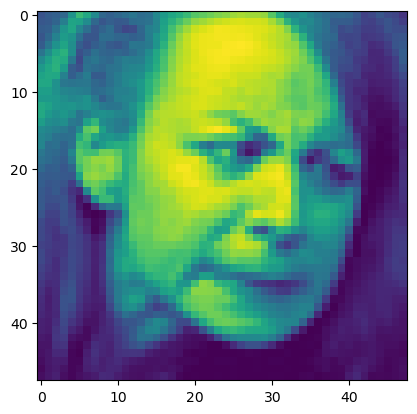

In [7]:
from matplotlib.image import imread
image = imread(angry_person)
plt.imshow(image)

In [8]:
# Checking the max value of a pixel 
image.max()

227

In [9]:
image.shape

(48, 48)

## Preparing the data for the model

In [3]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights=True)

from keras.preprocessing.image import ImageDataGenerator
batch_size  = 128

datagen_train  = ImageDataGenerator(rescale=1./255,
                           #width_shift_range=0.1,
                              #height_shift_range=0.1,
                             # shear_range=0.1,
                             #  zoom_range=0.1,
                               horizontal_flip=True,
                              # fill_mode='nearest',           
                              )
datagen_val = ImageDataGenerator(rescale=1./255,
                          # width_shift_range=0.1,
                             #height_shift_range=0.1,
                             # shear_range=0.1,
                             #  zoom_range=0.1,
                               horizontal_flip=True,
                             #  fill_mode='nearest',
                               
                              )

train_set = datagen_train.flow_from_directory(data_dir+"\\train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(data_dir+"\\validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [4]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#2nd CNN layer
model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.2))

#3rd CNN layer
model.add(Conv2D(256,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fully connected layer 2nd layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fully connected layer 2nd layer
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(no_of_classes, activation='softmax'))


# default optimizer (0.001)
opt = Adam(learning_rate = 0.0001)
# Categorical crossentropy till multi classification
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

## Training and saving the model and history data

In [5]:
from tensorflow.keras.models import load_model
results = model.fit(train_set,epochs=40,
                              validation_data=test_set,
                             callbacks=[early_stop])

model.save('model240530_v6_rescale.h5')

losses = pd.DataFrame(results.history)
losses.to_pickle("my_data_v3.pkl")


Epoch 1/40
226/226 [==============================] - 129s 560ms/step - loss: 2.1247 - accuracy: 0.1917 - val_loss: 1.9389 - val_accuracy: 0.1612
Epoch 2/40
226/226 [==============================] - 126s 558ms/step - loss: 1.9015 - accuracy: 0.2826 - val_loss: 1.8625 - val_accuracy: 0.2787
Epoch 3/40
226/226 [==============================] - 127s 562ms/step - loss: 1.7781 - accuracy: 0.3303 - val_loss: 1.7202 - val_accuracy: 0.3337
Epoch 4/40
226/226 [==============================] - 126s 559ms/step - loss: 1.6909 - accuracy: 0.3614 - val_loss: 1.6346 - val_accuracy: 0.3862
Epoch 5/40
226/226 [==============================] - 124s 549ms/step - loss: 1.6160 - accuracy: 0.3865 - val_loss: 1.5434 - val_accuracy: 0.4120
Epoch 6/40
226/226 [==============================] - 124s 550ms/step - loss: 1.5713 - accuracy: 0.4016 - val_loss: 1.5477 - val_accuracy: 0.4151
Epoch 7/40
226/226 [==============================] - 129s 571ms/step - loss: 1.5198 - accuracy: 0.4214 - val_loss: 1.4568 -

C:\Users\Schmoopie\AppData\Local\Temp\ipykernel_8760\1769494115.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_set)


In [7]:
losses = pd.DataFrame(results.history)

## Evaluating the model

<Axes: >

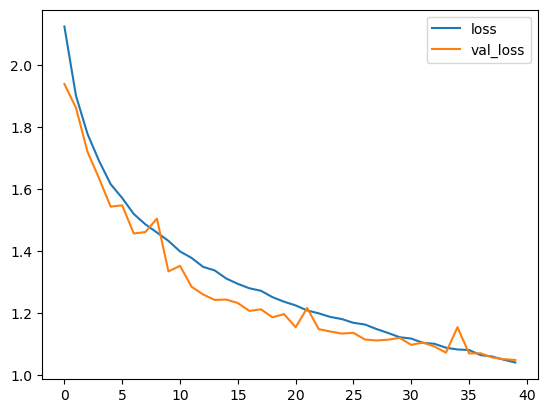

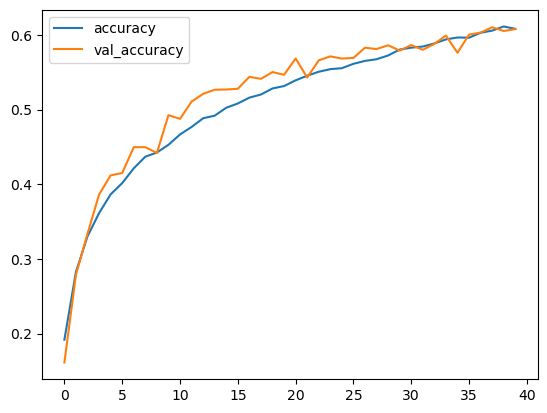

In [1]:

losses = pd.read_pickle("my_data_v3.pkl")
losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()

## När du är klar med koden skall du i slutet av skriptet besvara följande frågeställningar: 

In [ ]:
# 1.	Utmaningar du haft under arbetet samt hur du hanterat dem. 

# Googlande hjälpte att hitta rätt version av tensorflow, och andra importer som behövdes, då det inte gick att starta skriptet från youtube rakt av.
# Efter mycket tränande märkte jag att mina modeller bara visade en "emotion", så jag funderade på om det är för att vissa kategorier
# inte har så mycket data. Därför testade jag data augmentation, där man även kan använda sig av rescaling, vilket gjorde att det fungerade,
# eftersom rescaling används till webbkamerans data i python-skriptet.
# För mycket data augmentation gjorde att min kernel dog, så jag behöll inte allt. Detta kommer jag undersöka vidare.

# 2.	Vilket betyg du anser att du skall ha och varför. 

# G, jag har inte hunnit göra VG-delen då jag fastnade för länge på att träna modeller som inte fungerade när jag antog att de skulle fungera. 

# 3.	Tips du hade ”gett till dig själv” i början av kursen nu när du slutfört den. 

# Testa hela processen från början till slut före du börjar förfina.